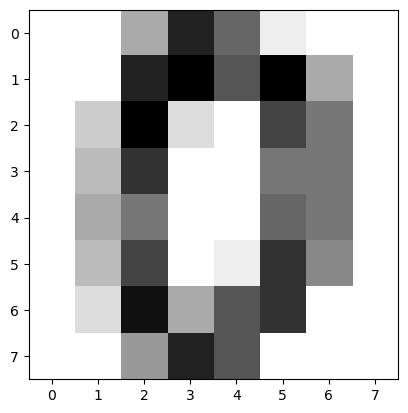

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
digits = load_digits()
X = digits.data  # (1797, 64)
y = digits.target.reshape(-1, 1)  # (1797, 1)

# 이미지 출력
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [3]:
# 2. 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# 3. train/test 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape # 확인

((1437, 64), (360, 64), (1437, 1), (360, 1))

In [5]:
# 4. numpy → torch tensor로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.flatten(), dtype=torch.long)
y_test_tensor = torch.tensor(y_test.flatten(), dtype=torch.long)

In [6]:
# 5. DNN 모델 정의
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(64, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

model = DNN()

In [7]:
# 6. 손실함수 & 최적화기
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
# 7. 학습
epochs = 20
for epoch in range(epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/20, Loss: 2.2912
Epoch 2/20, Loss: 2.2622
Epoch 3/20, Loss: 2.2334
Epoch 4/20, Loss: 2.2044
Epoch 5/20, Loss: 2.1752
Epoch 6/20, Loss: 2.1453
Epoch 7/20, Loss: 2.1146
Epoch 8/20, Loss: 2.0830
Epoch 9/20, Loss: 2.0501
Epoch 10/20, Loss: 2.0161
Epoch 11/20, Loss: 1.9807
Epoch 12/20, Loss: 1.9439
Epoch 13/20, Loss: 1.9056
Epoch 14/20, Loss: 1.8659
Epoch 15/20, Loss: 1.8245
Epoch 16/20, Loss: 1.7816
Epoch 17/20, Loss: 1.7371
Epoch 18/20, Loss: 1.6911
Epoch 19/20, Loss: 1.6435
Epoch 20/20, Loss: 1.5946


In [9]:
# 8. 평가
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    predicted = torch.argmax(y_pred, dim=1)
    accuracy = (predicted == y_test_tensor).float().mean()

print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")

Test Accuracy: 79.72%


In [10]:
# 9. 성능 지표와 혼동 행렬 출력
from sklearn.metrics import confusion_matrix, classification_report

# 예측 결과를 클래스 레이블로 변환
y_pred_class = predicted.numpy()  # torch tensor를 numpy array로 변환
y_test_class = y_test_tensor.numpy()  # torch tensor를 numpy array로 변환

# Confusion Matrix 출력
print("Confusion Matrix:\n")
print(confusion_matrix(y_test_class, y_pred_class))

# 정확도 및 성능 지표 출력
print("Classification Report:\n")
print(classification_report(y_test_class, y_pred_class))

Confusion Matrix:

[[29  0  0  1  0  0  1  1  0  1]
 [ 0 22  4  0  0  0  0  0  0  2]
 [ 0  1 29  2  0  0  0  1  0  0]
 [ 0  1  1 31  0  0  0  1  0  0]
 [ 0  0  0  0 45  0  1  0  0  0]
 [ 0  0  0  1  0 38  1  0  0  7]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  8  5  2  0  7  0  5  1  2]
 [ 0  0  0  8  1  1  0  5  0 25]]
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.69      0.79      0.73        28
           2       0.74      0.88      0.81        33
           3       0.69      0.91      0.78        34
           4       0.98      0.98      0.98        46
           5       0.81      0.81      0.81        47
           6       0.92      0.97      0.94        35
           7       0.72      0.97      0.82        34
           8       1.00      0.03      0.06        30
           9       0.68      0.62      0.65        40

    accuracy                  